# Sales Analysis

#### Import necessary libraries

In [1]:
import os
import pandas as pd

#### Combine sales data files for each month of the year in to a single file 'sale 2019'

In [2]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files
# print(files)
all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("sale 2019.csv", index=False)
    

#### Create a dataframe of all year data 

In [3]:
all_data = pd.read_csv("sale 2019.csv")
all_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


### Data Cleaning

##### Drop rows of NaN

In [4]:
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
all_data.dropna(how='all',inplace = True)
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Explore data 

In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [7]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


#### the describing table shows that there is sth wrong with the data beacause the top value (most frequent value) in the columns (Order ID, Order Date and Purchasse Address) makes no sense.

In [18]:
for c in all_data.columns:
    print(c, '_'*80)
    print(all_data[c].value_counts())

Order ID ________________________________________________________________________________
Order ID    355
160873        5
178158        4
242936        4
304802        4
           ... 
256420        1
206629        1
175528        1
198041        1
289927        1
Name: Order ID, Length: 178438, dtype: int64
Product ________________________________________________________________________________
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone         

In [77]:
from collections import Counter
for i in all_data.columns:
    if i in all_data[i].values:   
        print(i)
        print(Counter(all_data[i].values)[i])
#         print(all_data[all_data[i] == i])
    


Order ID
355
Product
355
Quantity Ordered
355
Price Each
355
Order Date
355
Purchase Address
355


above cell shows that in there is 355 values in the metioned columns that must be removed from the data

In [8]:
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

##### Get rid of text in the mentioned columns

In [9]:
# a more general solution is to use pd.to_numeric(s, errors='coerce') for the numeric columns 
# it will replace NaN for non numeric values, and then we can use dropna to drop the rows with NaN value
all_data = all_data[all_data['Product']!= 'Product']
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [23]:
# checking if the remained rows are OK
# all rows - number to be deleted = current number of rows
186305 - 355 


185950

#### check the column data type (after dropping the string values in the numeric columns)

In [13]:
print(all_data.shape,'\n')
all_data.info()

(185950, 6) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


#### correct the column type for the numeric columns

In [14]:
# correct column type for numeric columns
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [15]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


In [16]:
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [17]:
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


### Augment data with additional columns

#### Add month column

In [19]:
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [29]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = pd.to_numeric(all_data['Month'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [30]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 16.3+ MB


#### Add month column (alternative method)

In [47]:
# all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
# all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4


## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [34]:
all_data['Total Price'] =  all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Total Price
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


In [43]:
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Total Price
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [46]:
all_data.groupby(['Month'])['Total Price'].sum()

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Total Price, dtype: float64

##### the best month for sales is December, the results is also shown in the bar plot below

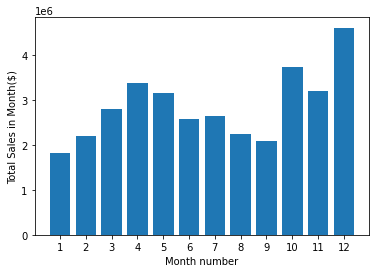

In [47]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,all_data.groupby(['Month'])['Total Price'].sum())
plt.xticks(months)
plt.ylabel('Total Sales in Month($)')
plt.xlabel('Month number')
plt.show()



#### Question 2: What city sold the most product?

In [54]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{x.split(",")[1].strip(" ")}')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Total Price
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.99


In [62]:
# to check if all the city names are ok (no duplicated or wrong value)
all_data.City.value_counts()

San Francisco    44732
Los Angeles      29605
New York City    24876
Boston           19934
Atlanta          14881
Dallas           14820
Seattle          14732
Portland         12465
Austin            9905
Name: City, dtype: int64

In [64]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Total Price
City,,,,
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Austin,11153,1.809874e+06,69829,1.819582e+06
Boston,22528,3.637410e+06,141112,3.661642e+06
Dallas,16730,2.752628e+06,104620,2.767975e+06
Los Angeles,33289,5.421435e+06,208325,5.452571e+06
New York City,27932,4.635371e+06,175741,4.664317e+06
Portland,14053,2.307747e+06,87765,2.320491e+06
San Francisco,50239,8.211462e+06,315520,8.262204e+06
Seattle,16553,2.733296e+06,104941,2.747755e+06


##### the city with the best Sale is San Francisco with about 8 million USD, the results is also shown in the bar plot below

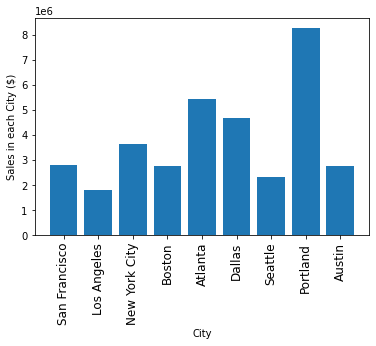

In [74]:
import matplotlib.pyplot as plt

cities = list(all_data.City.value_counts().keys())

plt.bar(cities,all_data.groupby(['City']).sum()['Total Price'])
plt.ylabel('Sales in each City ($)')
plt.xlabel('City')
plt.xticks(cities, rotation='vertical', size=12)
plt.show()

#### Question 3: What time in 24 hour of a day  should we display advertisements to maximize likelihood of customer's buying product?

In [77]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Total Price,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,99.99,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.99,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.99,9,27
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,8.97,20,56
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,700.00,16,0
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco,700.00,7,39
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco,379.99,17,30


In [78]:
all_data.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Total Price,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [104]:
# reordering the sales counts based on the hours (descending)
all_data.Hour.value_counts()the out put shows that the best hours base on sales quantity is 19 and 12 
# so maybe advertising slightly before these hours, may  maximize likelihood of customer's buying product

19    12905
12    12587
11    12411
18    12280
20    12228
13    12129
14    10984
10    10944
21    10921
17    10899
16    10384
15    10175
22     8822
9      8748
23     6275
8      6256
7      4011
0      3910
6      2482
1      2350
5      1321
2      1243
4       854
3       831
Name: Hour, dtype: int64

##### the out put shows that the best hours base on sales quantity is 19 and 12, so maybe advertising slightly before these hours, may  maximize likelihood of customer's buying product

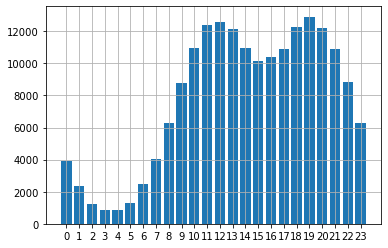

In [107]:
hours = range(0,24)
plt.bar(hours, all_data.groupby(['Hour']).count()['Quantity Ordered'])
plt.xticks(hours)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

### Question 4: What products are most often sold together?

#### first solution

In [176]:
orders = all_data.groupby(['Order ID'])

In [178]:
orders.first()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Total Price,Hour,Minute
Order ID,,,,,,,,,,
141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston,700.00,21,25
141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland,14.95,14,15
141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco,23.98,13,33
141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles,149.99,20,33
141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin,11.99,11,59
...,...,...,...,...,...,...,...,...,...,...
319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,San Francisco,14.95,20,58
319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,Los Angeles,7.68,12,1
319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,Seattle,400.00,6,43


In [195]:
# concatenate the string
all_data['Cart'] = all_data.groupby(['Order ID'])['Product'].transform(lambda x : ', '.join(x))

In [198]:
all_data.shape

(185950, 12)

In [199]:
all_data.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Total Price,Hour,Minute,Cart
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,23.90,8,46,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,99.99,22,30,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.00,14,38,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.99,14,38,"Google Phone, Wired Headphones"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.99,9,27,Wired Headphones
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,San Francisco,11.95,13,3,USB-C Charging Cable
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,Seattle,99.99,7,46,Bose SoundSport Headphones
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,Atlanta,11.95,10,58,USB-C Charging Cable
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,San Francisco,1700.00,10,38,Macbook Pro Laptop
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,Boston,11.99,14,5,Wired Headphones


In [196]:
all_data['Cart'].nunique()

385

In [197]:
all_data['Cart'].value_counts()

Lightning Charging Cable                     19831
AAA Batteries (4-pack)                       19826
AA Batteries (4-pack)                        19809
USB-C Charging Cable                         19792
Wired Headphones                             17208
                                             ...  
LG Washing Machine, AA Batteries (4-pack)        2
20in Monitor, LG Washing Machine                 2
LG Dryer, Vareebadd Phone                        2
LG Dryer, Wired Headphones                       2
LG Dryer, Flatscreen TV                          2
Name: Cart, Length: 385, dtype: int64

In [202]:
cart_value_counts = all_data['Cart'].value_counts()

In [203]:
orders = all_data.drop_duplicates(subset=['Order ID','Cart'], keep='first', inplace=False, ignore_index=False)

In [205]:
orders.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Total Price,Hour,Minute,Cart
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,23.90,8,46,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,99.99,22,30,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.00,14,38,"Google Phone, Wired Headphones"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.99,9,27,Wired Headphones
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,San Francisco,11.95,13,3,USB-C Charging Cable
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,Seattle,99.99,7,46,Bose SoundSport Headphones
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,Atlanta,11.95,10,58,USB-C Charging Cable
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,San Francisco,1700.00,10,38,Macbook Pro Laptop
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,Boston,11.99,14,5,Wired Headphones
11,176567,Google Phone,1,600.00,04/18/19 17:18,"444 7th St, Los Angeles, CA 90001",4,Los Angeles,600.00,17,18,Google Phone


In [228]:
orders.shape

(178437, 12)

In [246]:
carts = list(orders.Cart.value_counts().keys())
carts_more_than_one = [l for l in carts if ',' in l ]
carts_more_than_one

['iPhone, Lightning Charging Cable',
 'Google Phone, USB-C Charging Cable',
 'iPhone, Wired Headphones',
 'Vareebadd Phone, USB-C Charging Cable',
 'Google Phone, Wired Headphones',
 'iPhone, Apple Airpods Headphones',
 'Google Phone, Bose SoundSport Headphones',
 'Vareebadd Phone, Wired Headphones',
 'Google Phone, USB-C Charging Cable, Wired Headphones',
 'Vareebadd Phone, Bose SoundSport Headphones',
 'iPhone, Lightning Charging Cable, Wired Headphones',
 'Lightning Charging Cable, USB-C Charging Cable',
 'Lightning Charging Cable, AA Batteries (4-pack)',
 'AA Batteries (4-pack), Lightning Charging Cable',
 'Lightning Charging Cable, Lightning Charging Cable',
 'AAA Batteries (4-pack), USB-C Charging Cable',
 'AAA Batteries (4-pack), AAA Batteries (4-pack)',
 'AA Batteries (4-pack), AAA Batteries (4-pack)',
 'USB-C Charging Cable, USB-C Charging Cable',
 'Apple Airpods Headphones, AAA Batteries (4-pack)',
 'AA Batteries (4-pack), Wired Headphones',
 'AAA Batteries (4-pack), Lightnin

In [238]:
len(carts)

385

In [239]:
len(carts_more_than_one)

366

In [253]:
orders.Cart.value_counts()

Lightning Charging Cable                                        19831
AAA Batteries (4-pack)                                          19826
AA Batteries (4-pack)                                           19809
USB-C Charging Cable                                            19792
Wired Headphones                                                17208
                                                                ...  
Google Phone, USB-C Charging Cable, Apple Airpods Headphones        1
LG Washing Machine, 20in Monitor                                    1
LG Dryer, Google Phone                                              1
Vareebadd Phone, Wired Headphones, Apple Airpods Headphones         1
LG Dryer, Flatscreen TV                                             1
Name: Cart, Length: 385, dtype: int64

In [274]:
carts = pd.DataFrame(orders.Cart.value_counts())
carts.reset_index(inplace = True)
carts.columns = ['Products', 'Count']
carts

,Products,Count
0,Lightning Charging Cable,19831
1,AAA Batteries (4-pack),19826
2,AA Batteries (4-pack),19809
3,USB-C Charging Cable,19792
4,Wired Headphones,17208
...,...,...
380,"Google Phone, USB-C Charging Cable, Apple Airp...",1
381,"LG Washing Machine, 20in Monitor",1
382,"LG Dryer, Google Phone",1
383,"Vareebadd Phone, Wired Headphones, Apple Airpo...",1


In [297]:
carts['products list'] = carts['Products'].apply(lambda x : x.split(','))
carts['number of products'] = carts['products list'].apply(lambda x: len(x))
tops = carts[carts['number of products']>1]

Products                 iPhone, Lightning Charging Cable
Count                                                 882
splited               [iPhone,  Lightning Charging Cable]
number of products                                      2
Name: 17, dtype: object
Products                 Google Phone, USB-C Charging Cable
Count                                                   856
splited               [Google Phone,  USB-C Charging Cable]
number of products                                        2
Name: 18, dtype: object
Products                 iPhone, Wired Headphones
Count                                         361
splited               [iPhone,  Wired Headphones]
number of products                              2
Name: 21, dtype: object
Products                 Vareebadd Phone, USB-C Charging Cable
Count                                                      312
splited               [Vareebadd Phone,  USB-C Charging Cable]
number of products                                           2
Name

In [304]:
tops

,Products,Count,splited,number of products
17,"iPhone, Lightning Charging Cable",882,"[iPhone, Lightning Charging Cable]",2
18,"Google Phone, USB-C Charging Cable",856,"[Google Phone, USB-C Charging Cable]",2
21,"iPhone, Wired Headphones",361,"[iPhone, Wired Headphones]",2
22,"Vareebadd Phone, USB-C Charging Cable",312,"[Vareebadd Phone, USB-C Charging Cable]",2
23,"Google Phone, Wired Headphones",303,"[Google Phone, Wired Headphones]",2
...,...,...,...,...
380,"Google Phone, USB-C Charging Cable, Apple Airp...",1,"[Google Phone, USB-C Charging Cable, Apple A...",3
381,"LG Washing Machine, 20in Monitor",1,"[LG Washing Machine, 20in Monitor]",2
382,"LG Dryer, Google Phone",1,"[LG Dryer, Google Phone]",2
383,"Vareebadd Phone, Wired Headphones, Apple Airpo...",1,"[Vareebadd Phone, Wired Headphones, Apple Ai...",3


In [305]:
tops[tops["number of products"]>1].loc[:,'Count':].head(10)

,Count,splited,number of products
17,882,"[iPhone, Lightning Charging Cable]",2
18,856,"[Google Phone, USB-C Charging Cable]",2
21,361,"[iPhone, Wired Headphones]",2
22,312,"[Vareebadd Phone, USB-C Charging Cable]",2
23,303,"[Google Phone, Wired Headphones]",2
24,286,"[iPhone, Apple Airpods Headphones]",2
25,161,"[Google Phone, Bose SoundSport Headphones]",2
26,104,"[Vareebadd Phone, Wired Headphones]",2
27,77,"[Google Phone, USB-C Charging Cable, Wired H...",3
28,60,"[Vareebadd Phone, Bose SoundSport Headphones]",2


In [308]:
pd.set_option('display.max_colwidth', -1)
tops[tops["number of products"]>1].loc[:,'Count':].head(10)

<ipython-input-308-81f91356789c>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Count,splited,number of products
17,882,"[iPhone, Lightning Charging Cable]",2
18,856,"[Google Phone, USB-C Charging Cable]",2
21,361,"[iPhone, Wired Headphones]",2
22,312,"[Vareebadd Phone, USB-C Charging Cable]",2
23,303,"[Google Phone, Wired Headphones]",2
24,286,"[iPhone, Apple Airpods Headphones]",2
25,161,"[Google Phone, Bose SoundSport Headphones]",2
26,104,"[Vareebadd Phone, Wired Headphones]",2
27,77,"[Google Phone, USB-C Charging Cable, Wired Headphones]",3
28,60,"[Vareebadd Phone, Bose SoundSport Headphones]",2


#### Question 4: What products are most often sold together?
##### second solution

##### why there is difference between first and second solution in top 10 counts and also in about 4 of the items ?

I think the seconde method is not true or may not give an acurate answer.
It is just considering the combinations of 2 products that were best sellers. but in the question it is asked Question 4: What products are most often sold together?
there may be a combination of two or more that are mostly sold together.
In my idea method one just considers each order cart and based on that data tell us what are the most frequent combinations.
but method 2 gets all the orders carts and then counts the combination of two that is in each cart. that is why the groups counts is increased in this method. this method is more accurate if we want to find out what two product are often sold together and maybe from this list we can find the most frequnt choices that goes with each product.

In [309]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

<ipython-input-309-9004901cd214>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [47]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What product sold the most? Why do you think it sold the most?

In [317]:
product_group = all_data.groupby('Product')
product_group.first()


,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Total Price,Hour,Minute,Cart
Product,,,,,,,,,,,
20in Monitor,176588,1,109.99,04/02/19 04:00,"765 Cherry St, Seattle, WA 98101",4,Seattle,109.99,4,0,20in Monitor
27in 4K Gaming Monitor,176569,1,389.99,04/16/19 19:23,"657 Hill St, Dallas, TX 75001",4,Dallas,389.99,19,23,27in 4K Gaming Monitor
27in FHD Monitor,176587,1,149.99,04/29/19 19:38,"557 5th St, Los Angeles, CA 90001",4,Los Angeles,149.99,19,38,27in FHD Monitor
34in Ultrawide Monitor,176662,1,379.99,04/05/19 12:46,"678 Hickory St, Portland, OR 97035",4,Portland,379.99,12,46,34in Ultrawide Monitor
AA Batteries (4-pack),176570,1,3.84,04/22/19 15:09,"186 12th St, Dallas, TX 75001",4,Dallas,3.84,15,9,AA Batteries (4-pack)
AAA Batteries (4-pack),176575,1,2.99,04/27/19 00:30,"433 Hill St, New York City, NY 10001",4,New York City,2.99,0,30,AAA Batteries (4-pack)
Apple Airpods Headphones,176572,1,150.00,04/04/19 20:30,"149 Dogwood St, New York City, NY 10001",4,New York City,150.00,20,30,Apple Airpods Headphones
Bose SoundSport Headphones,176559,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,99.99,22,30,Bose SoundSport Headphones
Flatscreen TV,176584,1,300.00,04/24/19 20:39,"936 Church St, San Francisco, CA 94016",4,San Francisco,300.00,20,39,Flatscreen TV


In [318]:
# quantity_ordered = product_group.sum()['Quantity Ordered']
product_group.sum()

,Quantity Ordered,Price Each,Month,Total Price,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


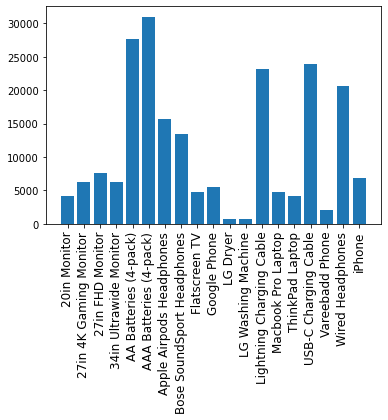

In [331]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

name = [product for product, df in product_group]
plt.bar(name, quantity_ordered)
plt.xticks(name, rotation='vertical', size=12)
plt.show()

<ipython-input-335-a25a7eb6627d>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(name, rotation='vertical', size=10)
<ipython-input-335-a25a7eb6627d>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


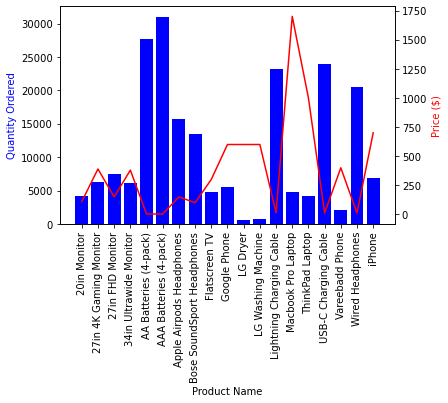

In [335]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(name, quantity_ordered, color='b')
ax2.plot(name, prices, color='r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticklabels(name, rotation='vertical', size=10)

fig.show()

##### the above figure shows that low price products are the ones that are sold the most.